<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/Keras_MNIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Handwritten Image Detection with Keras using MNIST data**

In this exercise we will work with image data: specifically the famous MNIST data set. This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). The images are 28 pixels by 28 pixels for a total of 784 pixels. This is quite small by image standards. Also, the images are well centered and isolated. This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it. Then it will be your turn to try different models and see if you can improve performance

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[444]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  33, 229, 254, 254, 254, 254, 219,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 254, 169,  83,  86, 231, 254,
        169,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 121,  12,   0,   0, 110, 254,
        254,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 136,
        254, 240,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
        254, 254, 146,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        124, 254, 250,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         27, 222, 246,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 196, 175,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 114, 255,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  78, 254, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  78, 255, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 130, 254,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  88,
        131, 226, 206,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 230,
        255, 254, 170,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        182, 254, 254, 174,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         17, 182, 224, 254, 213,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  16,  28, 237, 254, 248, 180,  62,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  32, 203, 254, 254, 246, 148,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [7]:
y_train[444]

np.uint8(2)

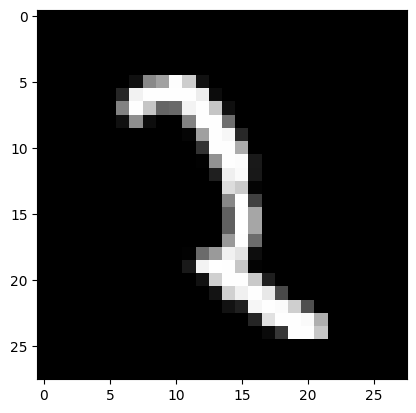

In [8]:
plt.imshow(x_train[444], cmap='Greys_r')

In [9]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [10]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [11]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [12]:
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [13]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])

In [15]:
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7502 - loss: 0.8189 - val_accuracy: 0.9359 - val_loss: 0.2072
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9209 - loss: 0.2680 - val_accuracy: 0.9552 - val_loss: 0.1475
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9375 - loss: 0.2074 - val_accuracy: 0.9628 - val_loss: 0.1260
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9458 - loss: 0.1772 - val_accuracy: 0.9628 - val_loss: 0.1179
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9530 - loss: 0.1576 - val_accuracy: 0.9665 - val_loss: 0.1077
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9560 - loss: 0.1420 - val_accuracy: 0.9713 - val_loss: 0.0985
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9610 - loss: 0.1302 - val_accuracy: 0.9691 - val_loss: 0.1026
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9620 - loss: 0.1240 - val_accuracy: 0.

In [16]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09517038613557816
Test accuracy: 0.9753999710083008


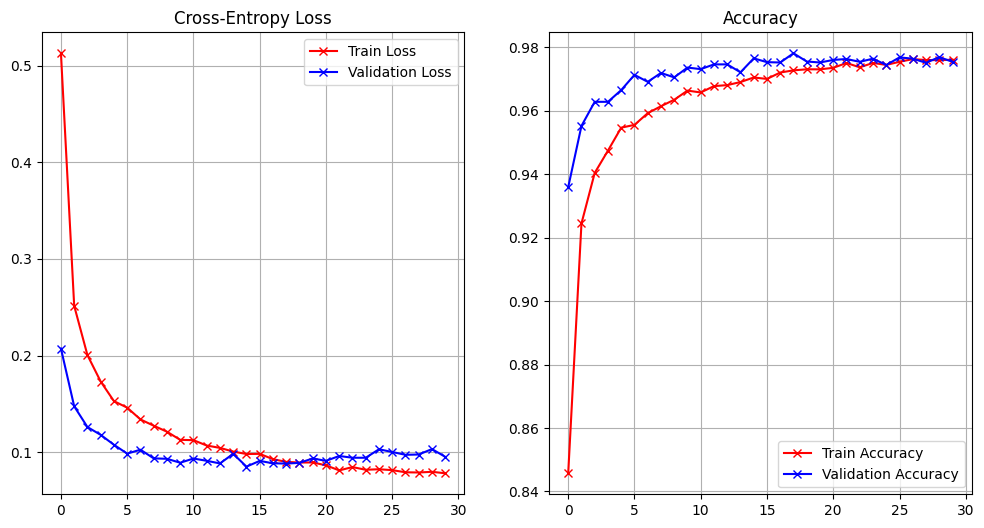

In [17]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)


# Think about the following questions

1.How do model_1 and model_2 compare? Which do you prefer? If you were going to put one into production, which would you choose and why?

2.Compare the trajectories of the loss function on the training set and test set for each model? How do they compare? What does that suggest about each model? Do the same for accuracy? Which do you think is more meaningful, the loss or the accuracy?

3.Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model. Try it out below? Did it improve the performance?


# Answers

1.Model 2 is way bigger and more powerful — with more neurons and dropout, it nails around 98% accuracy. So if you want your app to perform well, go with Model 2. But Model 1 is lighter and faster, so it’s perfect for mobile or low-power devices where speed and size matter more.

2.Model 1 learns okay but tends to stall or wobble a bit, meaning it might be underfitting. Model 2 has smooth, solid progress, and training and validation scores match up well — that’s a good sign it’s not overfitting and will work well on new data.

3.Some ideas to boost performance include adding a third hidden layer with around 300 units, switching the optimizer to Adam (which often helps training go smoother and faster), training for more epochs like 40, and adding batch normalization layers before activations to stabilize and speed up learning.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

model_3 = Sequential([
    Dense(400, input_shape=(784,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(300),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(100),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.fit(x_train, y_train, epochs=40, batch_size=128, validation_split=0.2)

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7516 - loss: 0.8079 - val_accuracy: 0.9503 - val_loss: 0.1661
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9302 - loss: 0.2342 - val_accuracy: 0.9657 - val_loss: 0.1159
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9494 - loss: 0.1725 - val_accuracy: 0.9681 - val_loss: 0.1042
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9566 - loss: 0.1450 - val_accuracy: 0.9740 - val_loss: 0.0902
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9607 - loss: 0.1260 - val_accuracy: 0.9742 - val_loss: 0.0863
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9654 - loss: 0.1118 - val_accuracy: 0.9767 - val_loss: 0.0814
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9688 - loss: 0.1042 - val_accuracy: 0.9787 - val_loss: 0.0747
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9708 - loss: 0.0923 - val_a

In [19]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0755
Test accuracy: 98.43%
